In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import  matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import datetime

%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/masanoritakahashi/Documents/forecast_PM2.5/model'

In [3]:
#trainデータ
#df=pd.read_csv("/Users/masanoritakahashi/Documents/forecast_PM2.5/modefied_data/rohini_1016_6hours.csv").iloc[:,1:]
#検証用データ
#test=pd.read_csv("/Users/masanoritakahashi/Documents/forecast_PM2.5/modefied_data/rohini_1113_6hours.csv").iloc[:,1:]

In [15]:
df=pd.read_csv("/Users/masanoritakahashi/Documents/aqi/modefieddata/rohini_1015.csv").iloc[:,1:]

In [16]:
df.head()

,rohini,utc_time
0,19.0,2019-07-17 00:00:00
1,27.0,2019-07-17 01:00:00
2,13.0,2019-07-17 02:00:00
3,9.0,2019-07-17 03:00:00
4,12.0,2019-07-17 04:00:00


In [17]:
df.dtypes

rohini      float64
utc_time     object
dtype: object

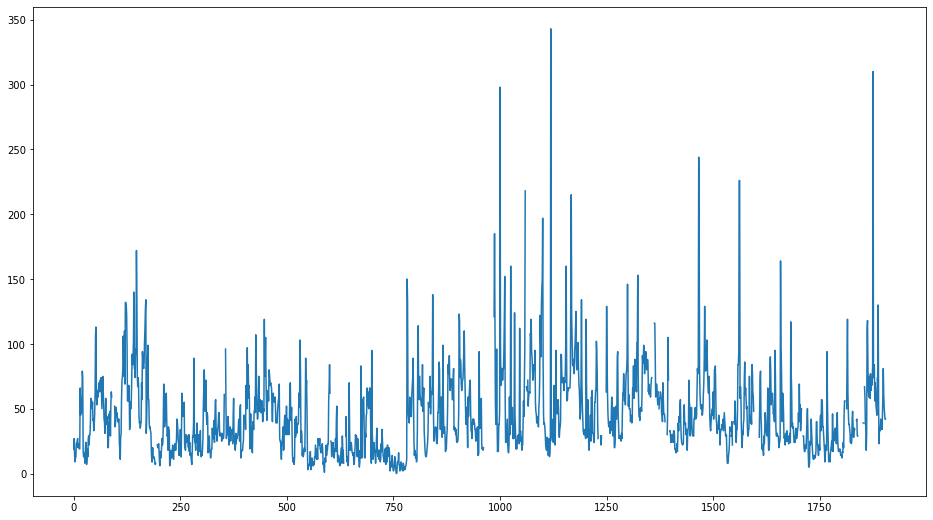

In [18]:
plt.figure(figsize=(16,9))
plt.plot(df["rohini"])

In [19]:
#7/17 00:00〜09/29 08:00までをtrain
train=df[:-120]
#09/29 09:00　〜 10/04 08:00までの5日間を予測
test=df[-120:]

In [20]:
f=lambda x:datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

train["utc_time"]=train["utc_time"].apply(f)
test["utc_time"]=test["utc_time"].apply(f)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
ts=train["rohini"].interpolate('linear')
ts.index=train["utc_time"]

ts_test=test["rohini"].interpolate('linear')
ts_test.index=test["utc_time"]

# ローカルレベルの推定

In [22]:
model_local=sm.tsa.UnobservedComponents(ts, "local level")
result_local=model_local.fit()
result_local.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 rohini   No. Observations:                 1785
Model:                    local level   Log Likelihood               -8143.468
Date:                Mon, 23 Dec 2019   AIC                          16290.936
Time:                        15:12:11   BIC                          16301.909
Sample:                    07-17-2019   HQIC                         16294.989
                         - 09-29-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   196.8197      3.927     50.115      0.000     189.122     204.517
sigma2.level       218.0561      5.542     39.346      0.000     207.194     228.918
===================================================================================
Ljung-Box (Q):                      263.60   Jarque-Bera (JB):            103813.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             2.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

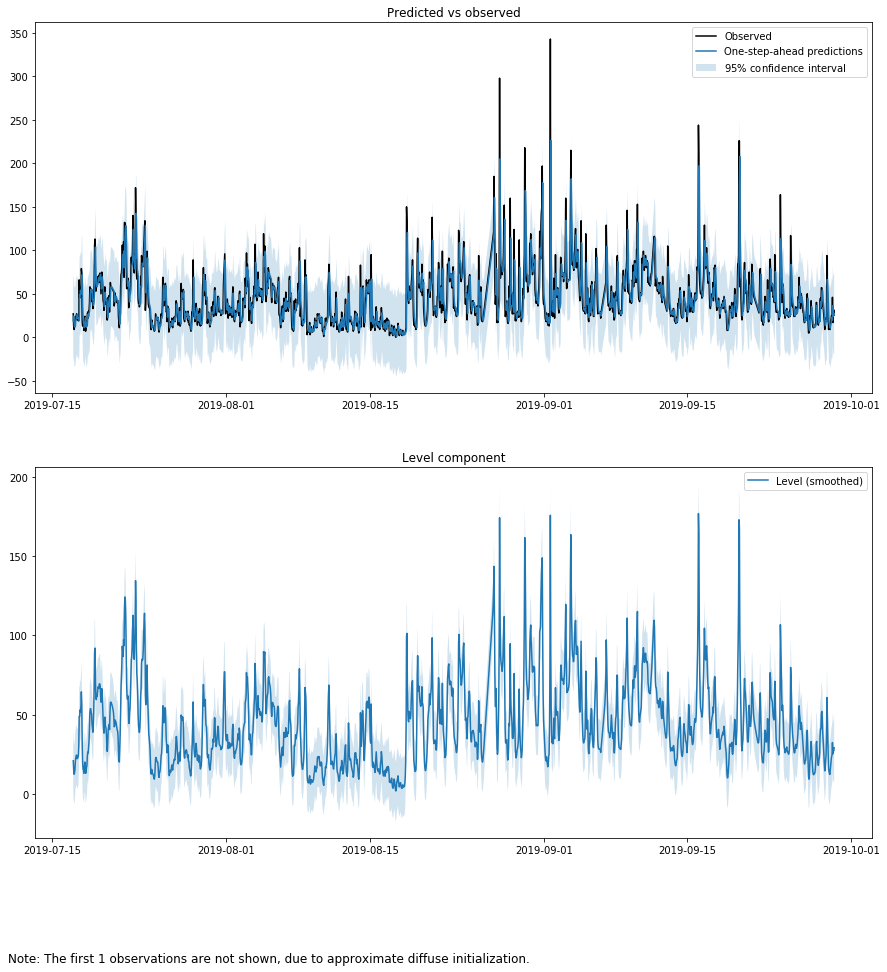

In [23]:
rcParams['figure.figsize'] = 15, 15
fig=result_local.plot_components()

# ローカル線形トレンドモデル

In [24]:
model_local_linear=sm.tsa.UnobservedComponents(ts, "local linear trend")
result_local_linear=model_local_linear.fit()
result_local_linear.summary()

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 rohini   No. Observations:                 1785
Model:             local linear trend   Log Likelihood               -8143.598
Date:                Mon, 23 Dec 2019   AIC                          16293.196
Time:                        15:12:17   BIC                          16309.654
Sample:                    07-17-2019   HQIC                         16299.274
                         - 09-29-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   196.1530      5.057     38.792      0.000     186.242     206.064
sigma2.level       219.1758      8.641     25.364      0.000     202.239     236.113
sigma2.trend      1.223e-10      0.006   2.22e-08      1.000      -0.011       0.011
===================================================================================
Ljung-Box (Q):                      262.89   Jarque-Bera (JB):            103722.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             2.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

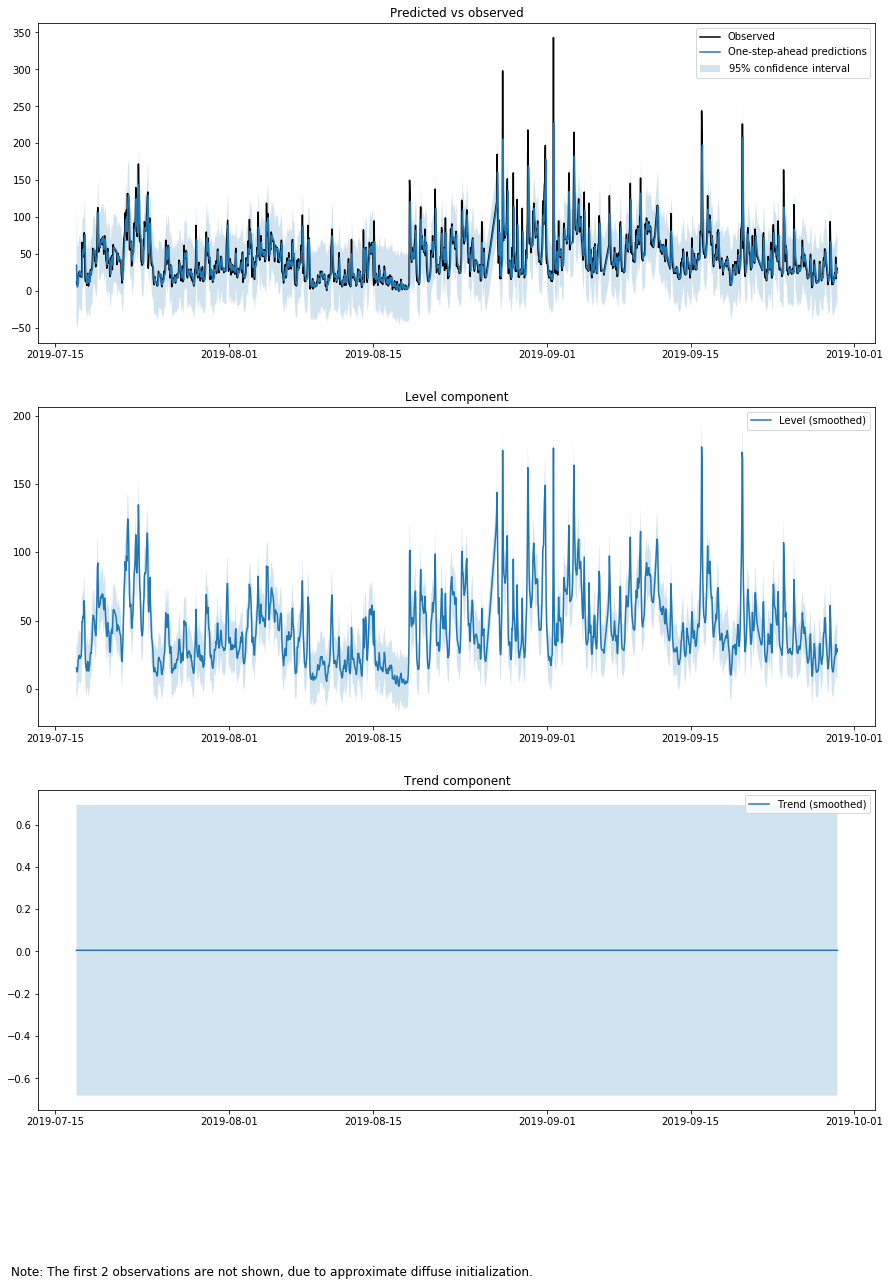

In [25]:
rcParams['figure.figsize'] = 15, 20
fig = result_local_linear.plot_components()

# 自己相関の確認（ACF: Autocorrelation Function）

In [26]:
#自己相関係数の出力
ts_acf=sm.tsa.stattools.acf(ts.values, nlags=40)
ts_acf

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.70468092, 0.53396727, 0.4476746 , 0.38590258,
       0.33510283, 0.28921621, 0.252197  , 0.24200667, 0.22150356,
       0.21536548, 0.24381458, 0.27166634, 0.25848042, 0.23378855,
       0.20980234, 0.20428939, 0.21064624, 0.22673053, 0.24421158,
       0.24680874, 0.26715504, 0.2843514 , 0.30761981, 0.34431582,
       0.32141582, 0.22906093, 0.17495543, 0.13889372, 0.11030412,
       0.10058993, 0.09295889, 0.08481166, 0.08728395, 0.11643849,
       0.13276527, 0.13953237, 0.1123308 , 0.08630822, 0.0701067 ,
       0.05962163])

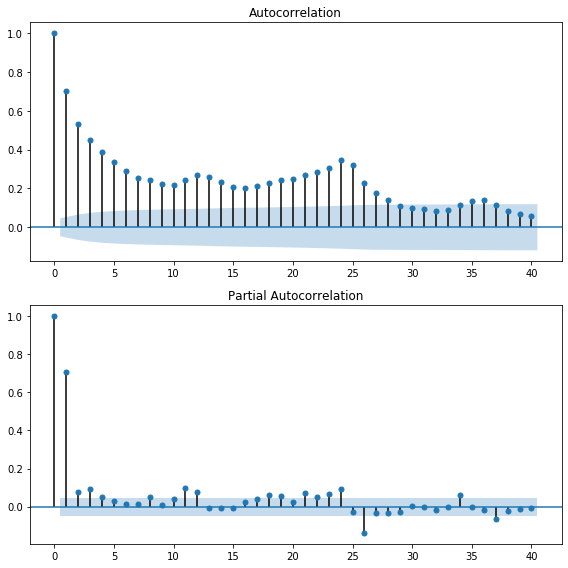

In [27]:
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1) 

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2) 

plt.tight_layout() 

# 季節変動の取り込み

In [28]:
model_season_local_level = sm.tsa.UnobservedComponents(
    ts,
    'local level',
    seasonal=24
)

result_season_local_level = model_season_local_level.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=model_season_local_level.fit(method='nm', maxiter=500).params,
)

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 4.471616
         Iterations: 115
         Function evaluations: 211
Optimization terminated successfully.
         Current function value: 4.471616
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [29]:
result_season_local_level.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                        rohini   No. Observations:                 1785
Model:                           local level   Log Likelihood               -7981.834
                   + stochastic seasonal(24)   AIC                          15969.668
Date:                       Mon, 23 Dec 2019   BIC                          15986.089
Time:                               15:12:31   HQIC                         15975.737
Sample:                           07-17-2019                                         
                                - 09-29-2019                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   234.0178      3.915     59.778      0.000     226.345     241.691
sigma2.level       122.8080      4.100     29.952      0.000     114.772     130.844
sigma2.seasonal      0.0622      0.053      1.164      0.244      -0.043       0.167
===================================================================================
Ljung-Box (Q):                      151.97   Jarque-Bera (JB):            105954.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             2.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

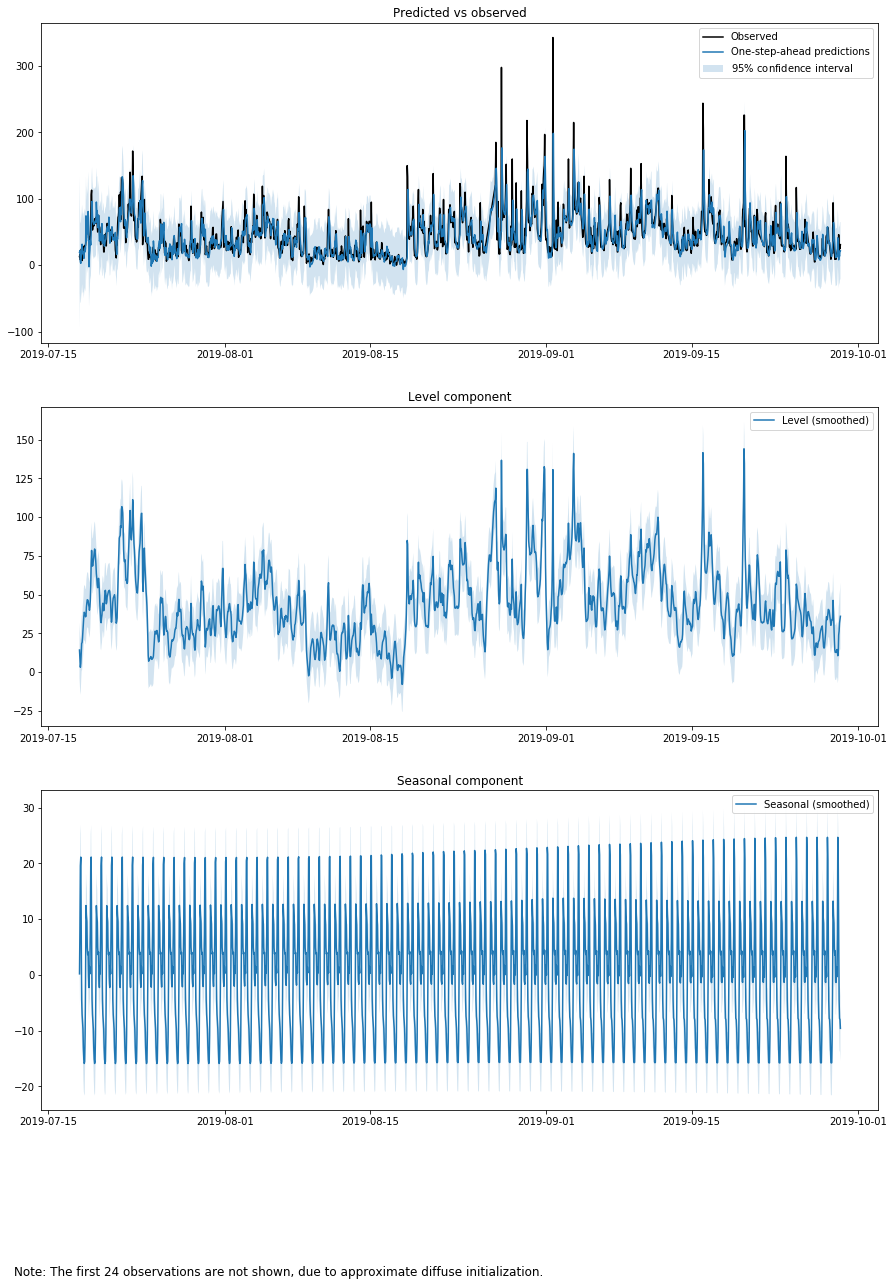

In [30]:
rcParams['figure.figsize'] = 15, 20
fig = result_season_local_level.plot_components()

In [31]:

model_season_trend = sm.tsa.UnobservedComponents(
    ts,
    'local linear trend',
    seasonal=24
)

result_season_trend = model_season_trend.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=model_season_trend.fit(method='nm', maxiter=500).params,
)

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Optimization terminated successfully.
         Current function value: 4.470069
         Iterations: 466
         Function evaluations: 796
Optimization terminated successfully.
         Current function value: 4.470069
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [32]:
result_season_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                        rohini   No. Observations:                 1785
Model:                    local linear trend   Log Likelihood               -7979.074
                   + stochastic seasonal(24)   AIC                          15966.148
Date:                       Mon, 23 Dec 2019   BIC                          15988.040
Time:                               15:13:02   HQIC                         15974.238
Sample:                           07-17-2019                                         
                                - 09-29-2019                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   233.3753      4.706     49.586      0.000     224.151     242.600
sigma2.level       123.6706      6.328     19.543      0.000     111.267     136.074
sigma2.trend      1.325e-12      0.003   4.32e-10      1.000      -0.006       0.006
sigma2.seasonal      0.0620      0.054      1.156      0.248      -0.043       0.167
===================================================================================
Ljung-Box (Q):                      151.27   Jarque-Bera (JB):            105832.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

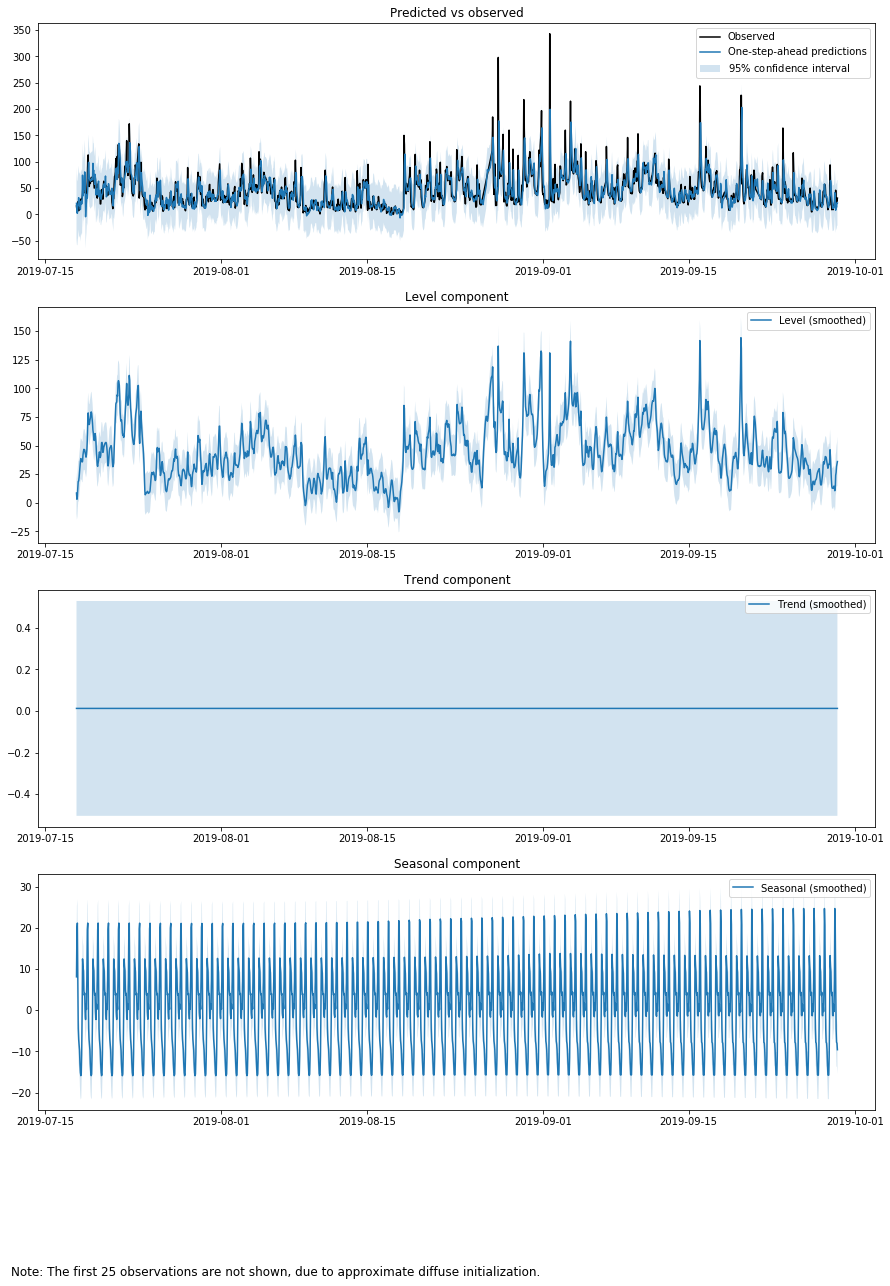

In [33]:
rcParams['figure.figsize'] = 15, 20
fig = result_season_trend.plot_components()

# 一番AUCの小さい値のモデルを使用

In [34]:
ts.max()

343.0

In [35]:
ts.min()

0.0

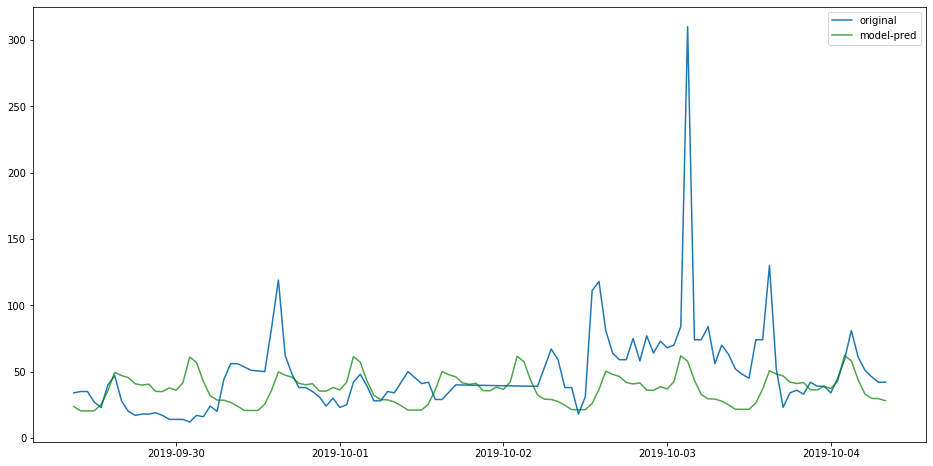

In [36]:
#09/29 09:00　〜 10/04 08:00までの5日間を予測
sarimax_pred_forecast= result_season_trend.predict("2019-09-29 09:00:00", "2019-10-04 08:00:00")

plt.figure(figsize=(16, 8))
plt.plot(ts_test, label="original")
plt.plot(sarimax_pred_forecast, c="g", label="model-pred", alpha=0.7)
plt.legend(loc='best')

In [37]:
df=pd.DataFrame(ts_test)
df["forecast"]=sarimax_pred_forecast

df["diff"]=np.sqrt((df["rohini"]-df["forecast"])**2)

In [38]:
#df.to_csv("State_Space_Representation.csv")

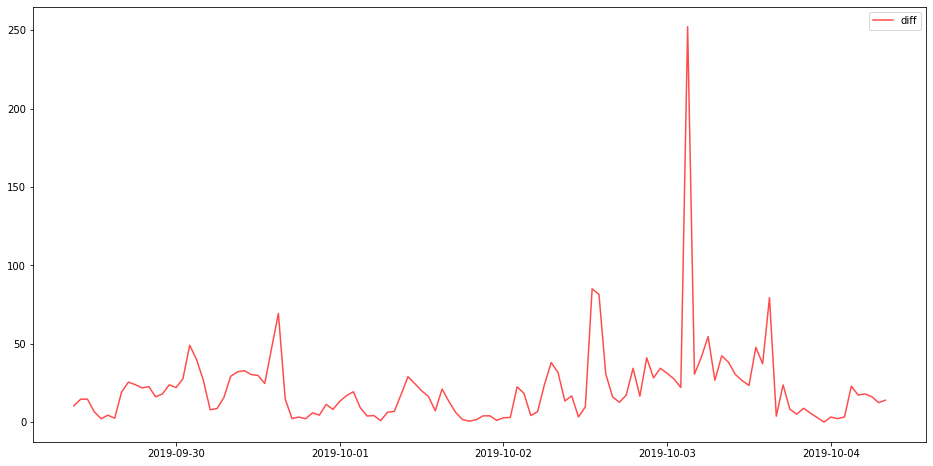

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(df["diff"], c="red", label="diff", alpha=0.7)
plt.legend(loc='best')

## 観測値・予測値に関するデータフレーム の作成

In [40]:
def aqi_category(x):
    if x>=0 and x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Satisfactory"
    elif x>100 and x<=200:
        return "Moderately"
    elif x>200 and x<=300:
        return "Poor"
    elif x>300 and x<=400:
        return "VeryPoor"
    elif x>400 :
        return "Severe"

In [41]:
df_forecast=pd.DataFrame(ts_test.values,index=ts_test.index, columns=["original"])
df_forecast["forecast"]=sarimax_pred_forecast

df_forecast

,original,forecast
utc_time,,
2019-09-29 09:00:00,34.0,23.679583
2019-09-29 10:00:00,35.0,20.443456
2019-09-29 11:00:00,35.0,20.365133
2019-09-29 12:00:00,27.0,20.431166
2019-09-29 13:00:00,23.0,25.089148
...,...,...
2019-10-04 04:00:00,61.0,43.771642
2019-10-04 05:00:00,51.0,33.039088
2019-10-04 06:00:00,46.0,29.812430


### 1時間おきにカテゴリー変換して精度を計る

In [42]:
df_forecast["original_category"]=df_forecast["original"].apply(lambda x:aqi_category(x))
df_forecast["forecast_category"]=df_forecast["forecast"].apply(lambda x:aqi_category(x))

#df_forecast

#pd.crosstab(df_forecast["original_category"], df_forecast["forecast_category"])

from sklearn.metrics import confusion_matrix
confusion_matrix(df_forecast["original_category"], df_forecast["forecast_category"], 
                 labels=["Good", "Satisfactory", "Moderately", "Poor", "VeryPoor",  "Severe"])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy_score ： {}".format(accuracy_score(df_forecast["original_category"], df_forecast["forecast_category"])))
print("precision_score ： {}".format(precision_score(df_forecast["original_category"], df_forecast["forecast_category"], average="micro")))
print("recall_score ： {}".format(recall_score(df_forecast["original_category"], df_forecast["forecast_category"], average="micro")))
print("f1_score ： {}".format(f1_score(df_forecast["original_category"], df_forecast["forecast_category"], average="micro")))

accuracy_score ： 0.6333333333333333
precision_score ： 0.6333333333333333
recall_score ： 0.6333333333333333
f1_score ： 0.6333333333333333


### 3時間おきにカテゴリー変換して精度を計る

In [43]:
df_forecast3=df_forecast.resample("3H").mean()

df_forecast3["original_category"]=df_forecast3["original"].apply(lambda x:aqi_category(x))
df_forecast3["forecast_category"]=df_forecast3["forecast"].apply(lambda x:aqi_category(x))

pd.crosstab(df_forecast3["original_category"], df_forecast3["forecast_category"])

print("accuracy_score ： {}".format(accuracy_score(df_forecast3["original_category"], df_forecast3["forecast_category"])))

accuracy_score ： 0.625


### 6時間おきにカテゴリー変換して精度を計る

In [44]:
df_forecast6=df_forecast.resample("6H").mean()

df_forecast6["original_category"]=df_forecast6["original"].apply(lambda x:aqi_category(x))
df_forecast6["forecast_category"]=df_forecast6["forecast"].apply(lambda x:aqi_category(x))


pd.crosstab(df_forecast6["original_category"], df_forecast6["forecast_category"])

print("accuracy_score ： {}".format(accuracy_score(df_forecast6["original_category"], df_forecast6["forecast_category"])))

accuracy_score ： 0.6666666666666666


### 12時間おきにカテゴリー変換して精度を計る

In [45]:
df_forecast12=df_forecast.resample("12H").mean()

df_forecast12["original_category"]=df_forecast12["original"].apply(lambda x:aqi_category(x))
df_forecast12["forecast_category"]=df_forecast12["forecast"].apply(lambda x:aqi_category(x))


pd.crosstab(df_forecast12["original_category"], df_forecast12["forecast_category"])

print("accuracy_score ： {}".format(accuracy_score(df_forecast12["original_category"], df_forecast12["forecast_category"])))

accuracy_score ： 0.5454545454545454


### 24時間おきにカテゴリー変換して精度を計る

In [46]:
df_forecast24=df_forecast.resample("24H").mean()

df_forecast24["original_category"]=df_forecast24["original"].apply(lambda x:aqi_category(x))
df_forecast24["forecast_category"]=df_forecast24["forecast"].apply(lambda x:aqi_category(x))


pd.crosstab(df_forecast24["original_category"], df_forecast24["forecast_category"])

print("accuracy_score ： {}".format(accuracy_score(df_forecast24["original_category"], df_forecast24["forecast_category"])))

accuracy_score ： 0.5
